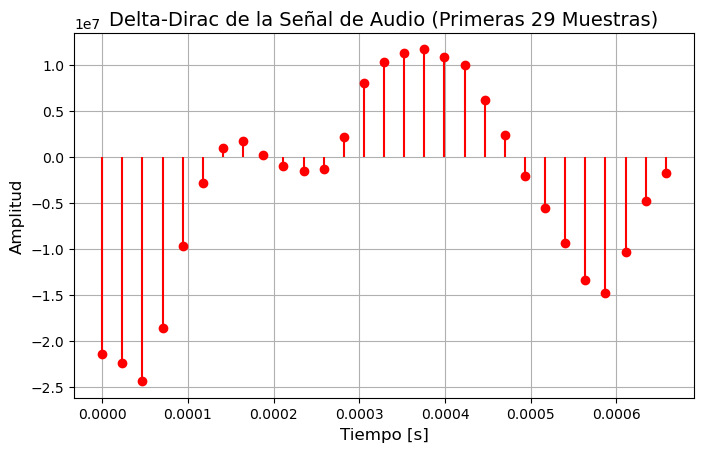

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from tkinter import Tk, filedialog, Button, Label, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os

# Función para cargar y graficar el archivo
def cargar_y_graficar():
    # Seleccionar archivo con filedialog
    ruta_archivo = filedialog.askopenfilename(
        filetypes=[("Archivos WAV", "*.wav")],
        title="Seleccione el archivo de audio"
    )
    
    if not ruta_archivo:
        return  # Si no selecciona archivo, no hace nada

    try:
        # Cargar el archivo de audio
        frecuencia_muestreo, datos = wav.read(ruta_archivo)

        # Verificar si el audio es estéreo o mono
        if len(datos.shape) == 2:
            # Si es estéreo, seleccionar solo un canal
            datos = datos[:, 0]

        # Extraer solo las primeras 30 muestras del archivo
        datos_30 = datos[:30]

        # Calcular la primera diferencia (delta) para las primeras 30 muestras
        delta_30 = np.diff(datos_30)

        # Crear el vector de tiempo para las 29 diferencias
        tiempo_delta_30 = np.linspace(0, 29 / frecuencia_muestreo, num=29)

        # Limpiar cualquier gráfica anterior
        for widget in frame_grafica.winfo_children():
            widget.destroy()

        # Crear una nueva figura para la gráfica
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.stem(tiempo_delta_30, delta_30, basefmt=" ", linefmt='r-', markerfmt='ro')
        ax.set_title('Delta-Dirac de la Señal de Audio (Primeras 29 Muestras)', fontsize=14)
        ax.set_xlabel('Tiempo [s]', fontsize=12)
        ax.set_ylabel('Amplitud', fontsize=12)
        ax.grid(True)

        # Embeder la figura en la ventana de Tkinter
        canvas = FigureCanvasTkAgg(fig, master=frame_grafica)
        canvas.draw()
        canvas.get_tk_widget().pack()

    except Exception as e:
        print(f"Error al cargar el archivo: {e}")

# Crear ventana principal
ventana = Tk()
ventana.title("Visualizador de Delta de Audio")
ventana.geometry("800x600")

# Etiqueta de título
etiqueta_titulo = Label(ventana, text="Seleccione un archivo de audio WAV para ver el Delta", font=("Arial", 12))
etiqueta_titulo.pack(pady=10)

# Botón para cargar archivo
boton_cargar = Button(ventana, text="Cargar Archivo de Audio", command=cargar_y_graficar, font=("Arial", 12))
boton_cargar.pack(pady=10)

# Frame donde se mostrará la gráfica
frame_grafica = Frame(ventana)
frame_grafica.pack(pady=20, expand=True, fill='both')

# Iniciar la interfaz gráfica
ventana.mainloop()
